In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('dailyActivity_merged.csv')

In [4]:
df.shape

(940, 15)

In [5]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [10]:
df['Id'].nunique() # total number of user

33

In [8]:
df = df[['Id', 'ActivityDate', 'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']]

In [16]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate']) 

In [26]:
df['ActiveTotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

In [27]:
df['ActiveTotalHours'] = df['ActiveTotalMinutes'] // 60

In [36]:
df['DaysOfWeek'] = df.ActivityDate.dt.day_name()

In [37]:
df

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveTotalMinutes,ActiveTotalHours,DaysOfWeek
0,1503960366,2016-04-12,13162,25,13,328,728,1985,1094,18,Tuesday
1,1503960366,2016-04-13,10735,21,19,217,776,1797,1033,17,Wednesday
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,1440,24,Thursday
3,1503960366,2016-04-15,9762,29,34,209,726,1745,998,16,Friday
4,1503960366,2016-04-16,12669,36,10,221,773,1863,1040,17,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,17,4,245,1174,2847,1440,24,Sunday
936,8877689391,2016-05-09,20226,73,19,217,1131,3710,1440,24,Monday
937,8877689391,2016-05-10,10733,18,11,224,1187,2832,1440,24,Tuesday
938,8877689391,2016-05-11,21420,88,12,213,1127,3832,1440,24,Wednesday


In [49]:
df.DaysOfWeek.value_counts()

Tuesday      152
Wednesday    150
Thursday     147
Friday       126
Saturday     124
Sunday       121
Monday       120
Name: DaysOfWeek, dtype: int64

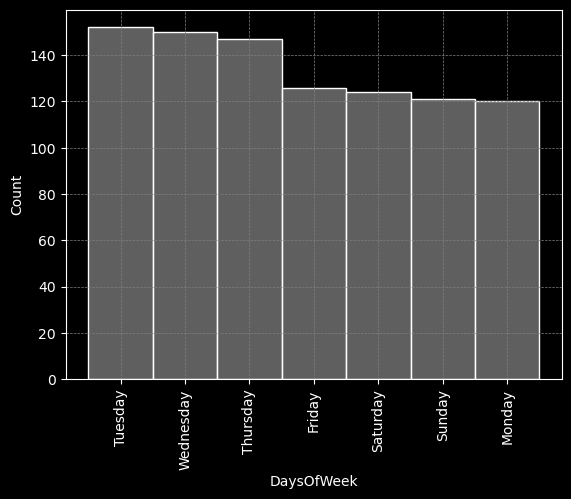

In [47]:
sns.histplot(df.DaysOfWeek, color='gray')
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

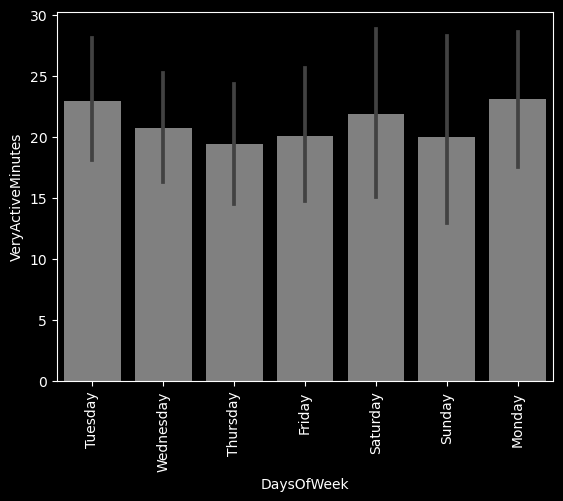

In [48]:
sns.barplot(data=df, y='VeryActiveMinutes', x='DaysOfWeek', color='gray')
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.show()

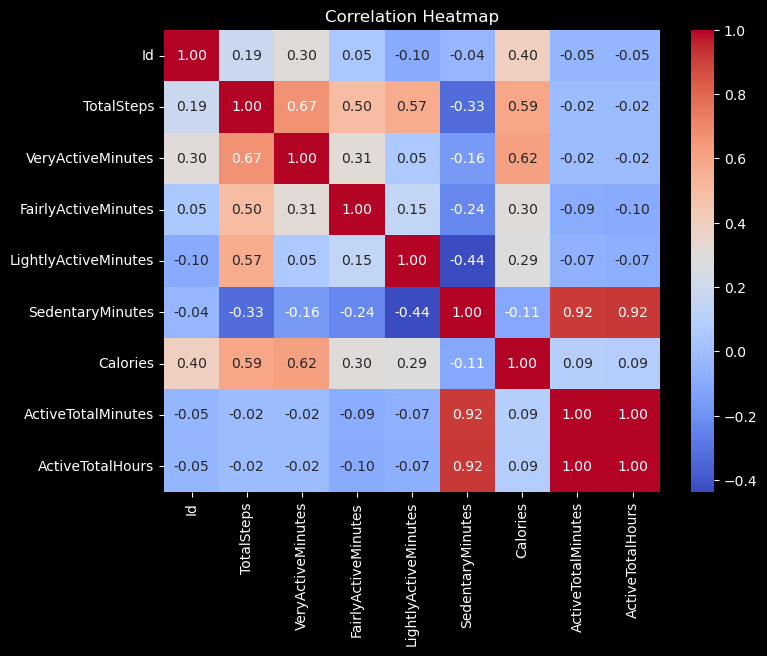

In [54]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.xticks(rotation=90)  
plt.yticks(rotation=0)  

plt.show()

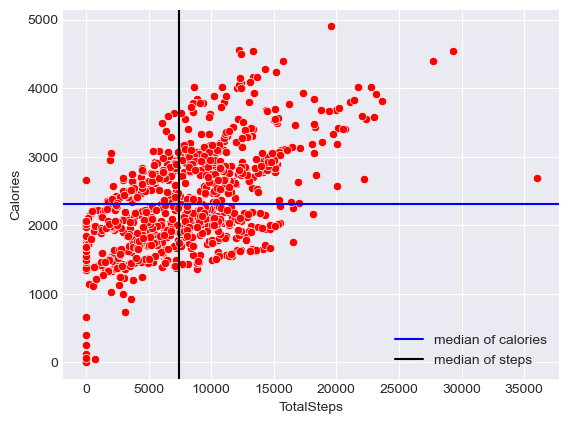

In [83]:
sns.scatterplot(data=df, x='TotalSteps', y='Calories', color='r')


plt.axhline(np.mean(df['Calories']), color='blue', label='median of calories')
plt.axvline(np.median(df['TotalSteps']), color='black', label='median of steps')

plt.legend()
plt.show()

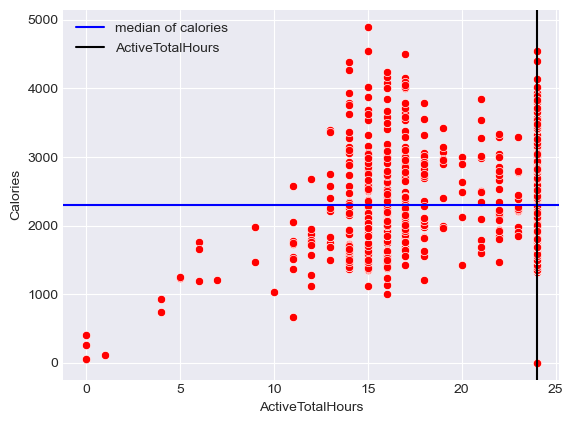

In [85]:
sns.scatterplot(data=df, x='ActiveTotalHours', y='Calories', color='r')


plt.axhline(np.mean(df['Calories']), color='blue', label='median of calories')
plt.axvline(np.median(df['ActiveTotalHours']), color='black', label='ActiveTotalHours')

plt.legend()
plt.show()

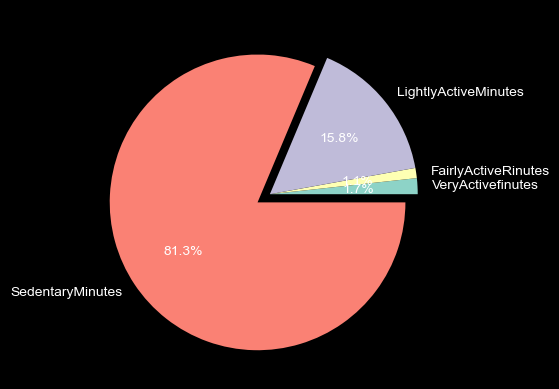

In [97]:
VeryActiveMinutes = df.VeryActiveMinutes.sum()

FairlyActiveMinutes = df.FairlyActiveMinutes.sum()

LightlyActiveMinutes= df.LightlyActiveMinutes.sum() 

SedentaryMinutes =  df.SedentaryMinutes.sum()

minutes = [VeryActiveMinutes, FairlyActiveMinutes,LightlyActiveMinutes, SedentaryMinutes] 
labels = ['VeryActivefinutes', 'FairlyActiveRinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

plt.pie(minutes, labels=labels, autopct = '%1.1f%%', explode = [0,0,0,0.1])
plt.show()